# Analysing Sales Dataset
### This dataset is about an electronics store's purchases in 2019. 
### it contains: 
- Order ID (The order unique id)
- Product (The product purchased)
- Quantity Ordered (The product quantity)
- Price Each (Price for each item)
- Order Date (The order date)
- Purchase Address (The address of the order)

### In this project, I will answer the following questions:
- What month has the largest sales
- What day has the most sales
- What weekday has the most orders
- What Price Range do people tend to buy more
- Which State, City, and Product has the most orders  
- What is the most and the least profitable product
- What are the most common products sold together

# Gathering

In [418]:
# Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
import plotly.express as px
import os 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [419]:
# Getting the path of the folder
pwd = os.getcwd()

In [420]:
# Making a list of the files names
files = ['\Sales_January_2019.csv','\Sales_February_2019.csv','\Sales_March_2019.csv','\Sales_April_2019.csv','\Sales_May_2019.csv','\Sales_June_2019.csv','\Sales_July_2019.csv','\Sales_August_2019.csv',
 '\Sales_September_2019.csv', '\Sales_October_2019.csv', '\Sales_November_2019.csv','\Sales_December_2019.csv']

# create empty list to store the data in 
Each_month = []
# append datasets into the list
for i in range(len(files)):
    Each_month.append(pd.read_csv(pwd+"\Data"+files[i]))


In [421]:
Each_month[0]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [422]:
# Combining the Tables into one table 
df = pd.concat([Each_month[0], Each_month[1], Each_month[2], Each_month[3], Each_month[4], Each_month[5], Each_month[6], Each_month[7], Each_month[8], Each_month[9], Each_month[10], Each_month[11]], ignore_index=True)


# Assessing

In [423]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [425]:
# Checking the unique values of the product columns
# And found that the header in repeated as a record
df.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

In [426]:
# Showing the records with the problem
df.query("Product == 'Product'")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184931,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [427]:
# Checking the NULLs 
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [428]:
# Checking Duplicates
df[df.duplicated(keep = False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
874,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
...,...,...,...,...,...,...
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185729,NaN,NaN,NaN,NaN,NaN,NaN
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185955,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## Issues:
- Wrong data types for some columns
- The columns headers are repeated within the data
- Columns with two words need to be changed
- There are NULL Values 
- There are Duplicates in the data

# Cleaning

In [429]:
# making a copy from the data 
df_modified = df.copy()

- There are NULL values

In [430]:
# Dropping the NULLs
df_modified.dropna(inplace=True)

In [431]:
# Checking the NULLs after removing it
df_modified.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

- The columns headers are repeated within the data

In [432]:
df_modified = df_modified.query("Product != 'Product'")

In [433]:
df_modified.query("Product == 'Product'")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


- There are Duplicates in the data

In [434]:
df_modified.drop_duplicates(inplace=True)

In [435]:
df_modified[df_modified.duplicated(keep = False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


- Wrong data types for some columns

In [436]:
# Converting each column's type to its correct type
# but will leave order date with a string datatype to be able to convert it later
df_modified['Quantity Ordered'] = pd.to_numeric(df_modified['Quantity Ordered'])
df_modified['Price Each'] = pd.to_numeric(df_modified['Price Each'])


In [437]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


- Columns with two words needs to be changed

In [438]:
# Changing some columns name to be efficient in python
df_modified.rename(columns={'Order ID': 'Order_ID', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each':'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)

In [439]:
df_modified.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [440]:
# Extracting the date only from the Order_Date column 
df_modified['Date'] = df_modified['Order_Date'].apply(lambda x : x.split()[0])

#Extracting the Day from the Date column 
df_modified['Day'] = df_modified['Date'].apply(lambda x : x.split("/")[1])


In [441]:
df_modified.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Date,Day
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01/22/19,22
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01/28/19,28


In [442]:
# Convert the Date datatype column to a datetime 
df_modified['Date'] = pd.to_datetime(df_modified['Date'])

In [443]:
# Extracting the month and weekday from the date 
df_modified['Month'] = pd.DatetimeIndex(df_modified['Date']).month
df_modified['DayOfWeek'] = df_modified['Date'].dt.day_name()

In [444]:
# Checking 
df_modified.info()
df_modified

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  int64         
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  object        
 5   Purchase_Address  185686 non-null  object        
 6   Date              185686 non-null  datetime64[ns]
 7   Day               185686 non-null  object        
 8   Month             185686 non-null  int64         
 9   DayOfWeek         185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 15.6+ MB


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Date,Day,Month,DayOfWeek
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",2019-01-22,22,1,Tuesday
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",2019-01-28,28,1,Monday
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",2019-01-17,17,1,Thursday
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",2019-01-05,05,1,Saturday
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",2019-01-25,25,1,Friday
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",2019-12-11,11,12,Wednesday
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",2019-12-01,01,12,Sunday
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",2019-12-09,09,12,Monday
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",2019-12-03,03,12,Tuesday


In [445]:
# Converting the month from the month number to the month name
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_num = [1,2,3,4,5,6,7,8,9,10,11,12]
for n in months_num:
    df_modified['Month'][df_modified['Month'] == n] = months[n-1]
df_modified

<ipython-input-445-e9540837e5e1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Date,Day,Month,DayOfWeek
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",2019-01-22,22,Jan,Tuesday
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",2019-01-28,28,Jan,Monday
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",2019-01-17,17,Jan,Thursday
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",2019-01-05,05,Jan,Saturday
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",2019-01-25,25,Jan,Friday
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",2019-12-11,11,Dec,Wednesday
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",2019-12-01,01,Dec,Sunday
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",2019-12-09,09,Dec,Monday
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",2019-12-03,03,Dec,Tuesday


In [446]:
# Checking
df_modified.Month.value_counts()

Dec    24944
Oct    20249
Apr    18257
Nov    17544
May    16552
Mar    15128
Jul    14275
Jun    13535
Feb    11957
Aug    11943
Sep    11603
Jan     9699
Name: Month, dtype: int64

In [447]:
# Extracting the city and state from the address 
df_modified['City'] = df_modified['Purchase_Address'].apply(lambda x : x.split(',')[1])
df_modified['State'] = df_modified['Purchase_Address'].apply(lambda x : x.split(',')[2])
df_modified['State'] = df_modified['State'].apply(lambda x : x.split()[0])
df_modified

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Date,Day,Month,DayOfWeek,City,State
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",2019-01-22,22,Jan,Tuesday,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",2019-01-28,28,Jan,Monday,Portland,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",2019-01-17,17,Jan,Thursday,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",2019-01-05,05,Jan,Saturday,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",2019-01-25,25,Jan,Friday,Austin,TX
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",2019-12-11,11,Dec,Wednesday,San Francisco,CA
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",2019-12-01,01,Dec,Sunday,Los Angeles,CA
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",2019-12-09,09,Dec,Monday,Seattle,WA
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",2019-12-03,03,Dec,Tuesday,Dallas,TX


In [448]:
df_modified['State'].value_counts()

CA    74226
NY    24847
TX    24687
MA    19901
GA    14863
WA    14713
OR     9998
ME     2451
Name: State, dtype: int64

In [449]:
# Getting the total price for each order
df_modified['Sales'] = df_modified['Quantity_Ordered']* df_modified['Price_Each']
df_modified

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Date,Day,Month,DayOfWeek,City,State,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",2019-01-22,22,Jan,Tuesday,Boston,MA,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",2019-01-28,28,Jan,Monday,Portland,OR,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",2019-01-17,17,Jan,Thursday,San Francisco,CA,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",2019-01-05,05,Jan,Saturday,Los Angeles,CA,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",2019-01-25,25,Jan,Friday,Austin,TX,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",2019-12-11,11,Dec,Wednesday,San Francisco,CA,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",2019-12-01,01,Dec,Sunday,Los Angeles,CA,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",2019-12-09,09,Dec,Monday,Seattle,WA,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",2019-12-03,03,Dec,Tuesday,Dallas,TX,11.99


In [450]:
# Dropping order_date and address columns 
df_modified.drop(columns=['Order_Date', 'Purchase_Address'], inplace=True)
df_modified

,Order_ID,Product,Quantity_Ordered,Price_Each,Date,Day,Month,DayOfWeek,City,State,Sales
0,141234,iPhone,1,700.00,2019-01-22,22,Jan,Tuesday,Boston,MA,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,28,Jan,Monday,Portland,OR,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17,17,Jan,Thursday,San Francisco,CA,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05,05,Jan,Saturday,Los Angeles,CA,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25,25,Jan,Friday,Austin,TX,11.99
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11,11,Dec,Wednesday,San Francisco,CA,14.95
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01,01,Dec,Sunday,Los Angeles,CA,7.68
186847,319668,Vareebadd Phone,1,400.00,2019-12-09,09,Dec,Monday,Seattle,WA,400.00
186848,319669,Wired Headphones,1,11.99,2019-12-03,03,Dec,Tuesday,Dallas,TX,11.99


In [451]:
# Getting the Duplicated Order_ID to use them to know which products are sold together
same_ID = df_modified[df_modified["Order_ID"].duplicated(keep = False)]
same_ID

,Order_ID,Product,Quantity_Ordered,Price_Each,Date,Day,Month,DayOfWeek,City,State,Sales
41,141275,USB-C Charging Cable,1,11.95,2019-01-07,07,Jan,Monday,Austin,TX,11.95
42,141275,Wired Headphones,1,11.99,2019-01-07,07,Jan,Monday,Austin,TX,11.99
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02,02,Jan,Wednesday,Los Angeles,CA,150.00
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02,02,Jan,Wednesday,Los Angeles,CA,11.52
133,141365,Vareebadd Phone,1,400.00,2019-01-10,10,Jan,Thursday,New York City,NY,400.00
...,...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1,11.99,2019-12-11,11,Dec,Wednesday,Portland,OR,11.99
186773,319596,iPhone,1,700.00,2019-12-01,01,Dec,Sunday,New York City,NY,700.00
186774,319596,Lightning Charging Cable,1,14.95,2019-12-01,01,Dec,Sunday,New York City,NY,14.95
186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17,17,Dec,Tuesday,Austin,TX,379.99


In [452]:
# Grouping each two products with the same Order_ID
Grouped_Products = same_ID.groupby('Order_ID').Product.apply(','.join).reset_index()
Grouped_Products

,Order_ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


# Exploratory Analysis 

## 1) What month has the largest sales

The month with the largest sales is December


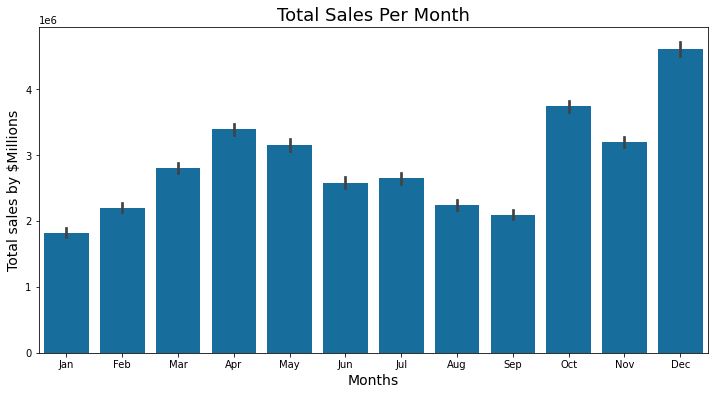

In [453]:
plt.figure(figsize = [12, 6]) 
base_color = sb.color_palette('colorblind')[0]
sb.barplot(data = df_modified, x='Month',y = "Sales", color = base_color,estimator=sum,
             order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Total sales by $Millions', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.xticks(rotation=0)
plt.title('Total Sales Per Month', fontsize=18)
print("The month with the largest sales is December")

## 2) What day has the most orders

There is no different between the days in orders numbers.


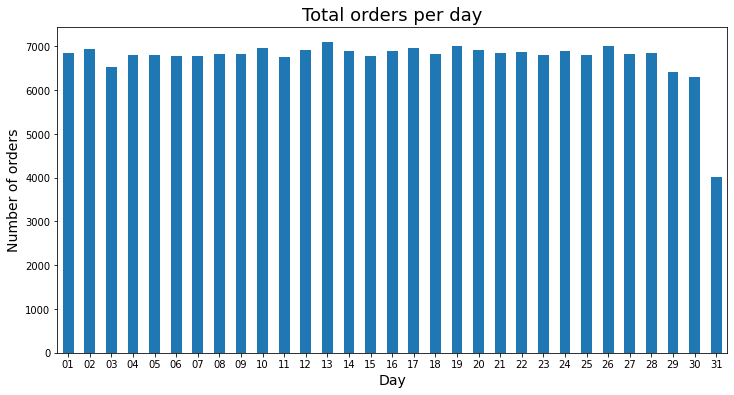

In [454]:
df_modified.groupby('Day')['Quantity_Ordered'].sum().plot(kind = 'bar', figsize=(12,6))
plt.ylabel('Number of orders', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.xticks(rotation=0)
plt.title('Total orders per day', fontsize=18)
print("There is no different between the days in orders numbers.")

## 3) What weekday has the most orders

There is no different between the weekdays.


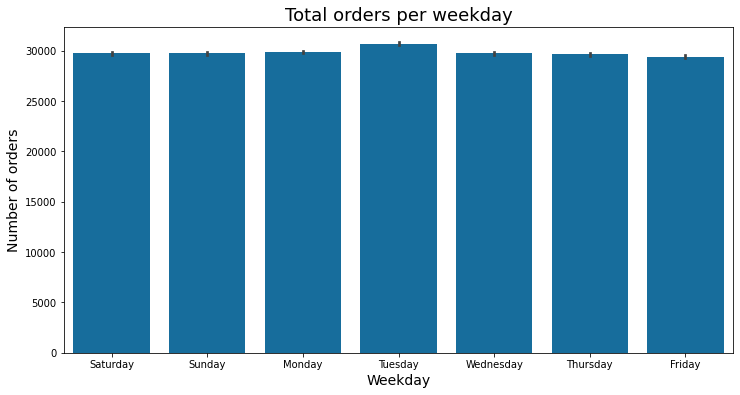

In [455]:
plt.figure(figsize = [12, 6]) 
base_color = sb.color_palette('colorblind')[0]
sb.barplot(data = df_modified, x='DayOfWeek',y = "Quantity_Ordered", color = base_color,estimator=sum,
             order=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.ylabel('Number of orders', fontsize=14)
plt.xlabel('Weekday', fontsize=14)
plt.title('Total orders per weekday', fontsize=18)
print("There is no different between the weekdays.")

## 4) What Price Range poeple tend to buy more?

It looks like people like to buy cheaper products more than the expensive ones


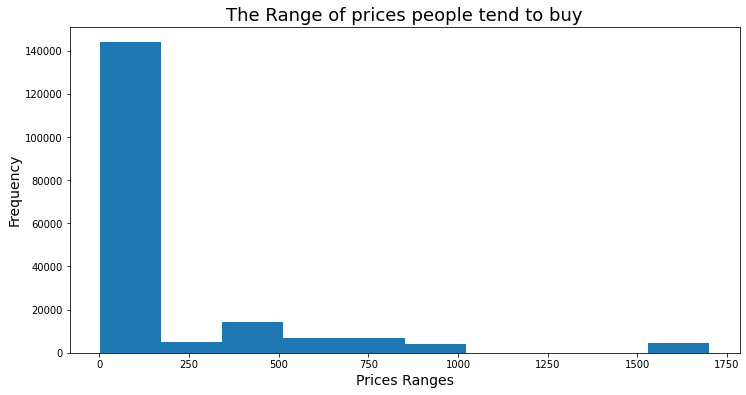

In [456]:
df_modified.Price_Each.hist(figsize=(12,6), grid = False);
plt.xlabel('Prices Ranges', fontsize=14);
plt.ylabel('Frequency', fontsize=14);
plt.title('The Range of prices people tend to buy', fontsize=18)
print("It looks like people like to buy cheaper products more than the expensive ones")

## 5) Which State, City, and Product has the most orders?  

California is the State with the biggest orders
San Francisco is the City with the biggest orders
Batteries are the most requested product


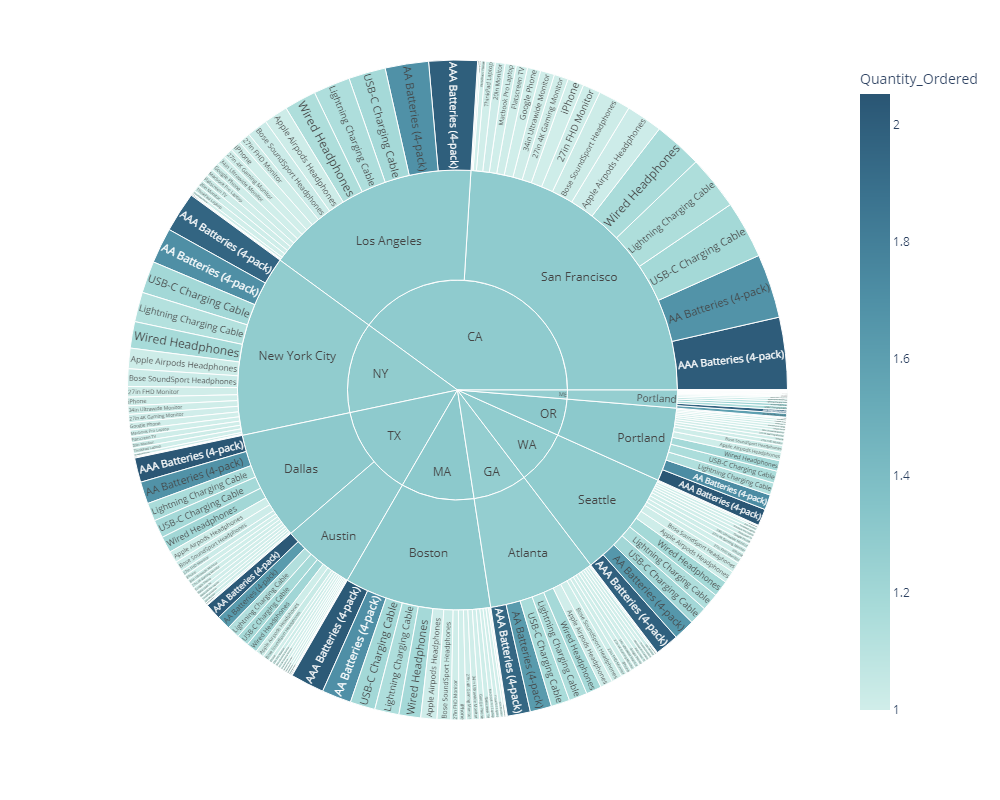

In [463]:
fig = px.sunburst(df_modified, path =["State","City", "Product"], values = "Quantity_Ordered", width = 1000, height= 800, color_continuous_scale='Teal', color = "Quantity_Ordered")
print("California is the State with the biggest orders\nSan Francisco is the City with the biggest orders\nBatteries are the most requested product")
fig.show("png")

## 6) What is the most profitable product

Despite the Batteries are the most product to be sold, 
The Macbook Pro Laptop is the most profitable product and the Batteries is the least profitable Products.


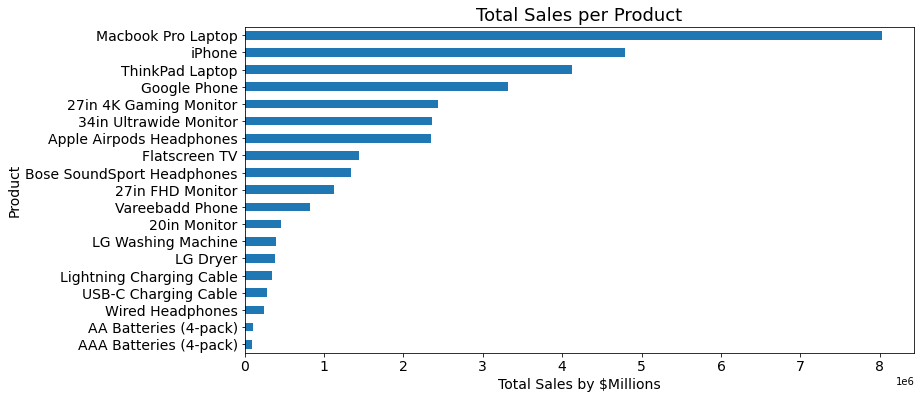

In [458]:
df_modified.groupby('Product')['Sales'].sum().sort_values().plot(kind='barh',fontsize = 14, figsize=(12,6))
plt.ylabel('Product', fontsize=14)
plt.xlabel('Total Sales by $Millions', fontsize=14)
plt.title('Total Sales per Product', fontsize=18)
print("Despite the Batteries are the most product to be sold, \nThe Macbook Pro Laptop is the most profitable product and the Batteries is the least profitable Products.")

## 7) What are the most common products sold together?

The most common products sold together are (iPhone and Lighting Charging Cable)


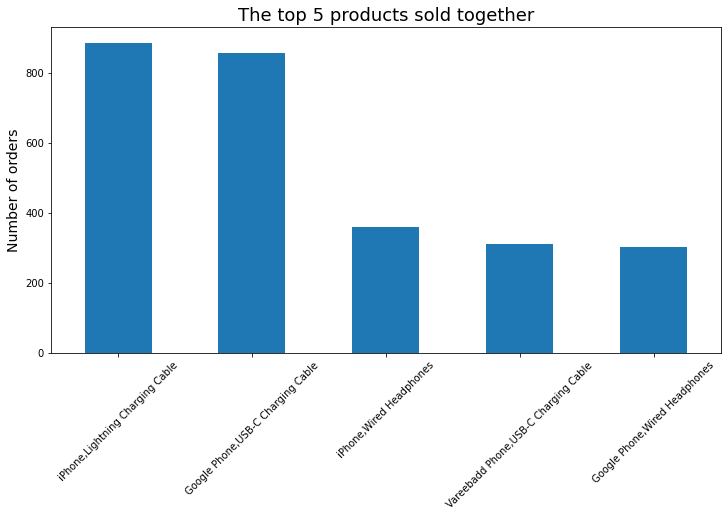

In [459]:
# Grouped_Products["Product"].sum().plot(kind = "bar")
Grouped_Products["Product"].value_counts().head(5).plot(kind = "bar",fontsize = 10, figsize=(12,6))
plt.xticks(rotation = 45)
plt.title("The top 5 products sold together", fontsize = 18)
plt.ylabel("Number of orders", fontsize = 14)
print("The most common products sold together are (iPhone and Lighting Charging Cable)")


In [462]:
# Saving the final dataset to excel file
df_modified.to_excel('FinalSales.xlsx', index=False)
Grouped_Products.to_excel('Grouped_Products.xlsx', index = False)